<a href="https://colab.research.google.com/github/MayukhBaruaha/Exploratory-Data-Analysis-/blob/main/SuperStore_USA/Copy_of_super_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Superstore_USA.csv',encoding= 'unicode_escape')
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,27-07-2011,27-07-2011,998.2023,8,1446.67,88523


In [ ]:
data.shape

(9426, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9426 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

## Data cleaning

In [ ]:
#To calculate the null values present in the column
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [ ]:
#Fill all the null values present in 'Product Base Margin' with it's mean values
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(),inplace=True)
#or
data.fillna({'Product Base Margin':data['Product Base Margin'].mean()},inplace=True)

In [ ]:
data.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

## EDA

**Order Priority**

In [ ]:
#Calculate the values of 'Order Priority'
data['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [ ]:
data['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [ ]:
## replace 'Critical ' with 'Critical'
data['Order Priority']=data['Order Priority'].replace('Critical ','Critical')

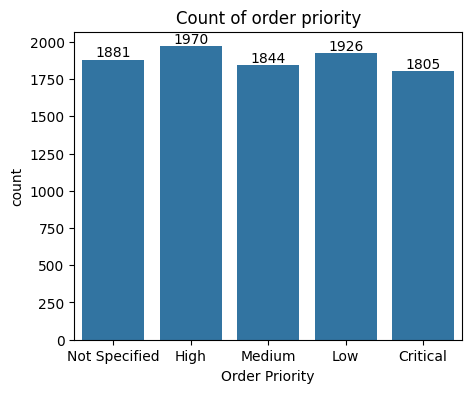

In [ ]:
# plot 'order priority' in graph
plt.figure(figsize=(5,4))
fig_1=sns.countplot(data=data,x='Order Priority')
for bars in fig_1.containers:
    fig_1.bar_label(bars)
plt.title('Count of order priority')
plt.show()

In [ ]:
data.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

**Ship Mode**

In [ ]:
data['Ship Mode'].value_counts()


Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

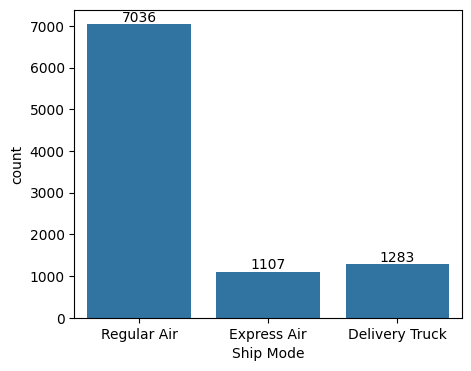

In [ ]:
#plot 'Ship Mode' in graph

plt.figure(figsize=(5,4))
fig_2=sns.countplot(data=data,x='Ship Mode')
for bars in fig_2.containers:
    fig_2.bar_label(bars)
plt.show()

*From the above graph we can see that Regular air is use to  delevar products as compared to others*

**Analysis between ship Mode and profile**

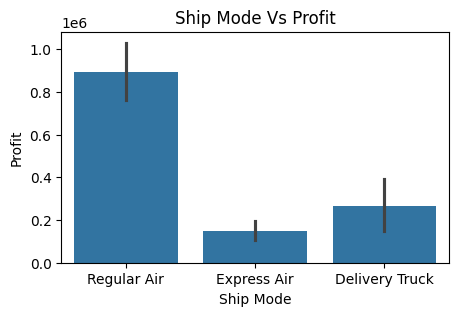

In [ ]:
#bar plot ship Mode vs Profite
plt.figure(figsize=(5,3))
sns.barplot(data=data,x='Ship Mode',y='Profit',estimator='sum')
plt.title('Ship Mode Vs Profit')
plt.show()

*From the graph we can see that Regular Air shiping Mode giving much profit*

In [ ]:
#get only Ship Mode and Profit column

data[['Ship Mode','Profit']].head(10)

,Ship Mode,Profit
0,Regular Air,1.3200
1,Express Air,4.5600
2,Express Air,-47.6400
3,Regular Air,-30.5100
4,Express Air,998.2023
5,Express Air,1388.0523
6,Delivery Truck,1001.4453
7,Delivery Truck,4390.3665
8,Regular Air,-141.2600
9,Regular Air,1045.4673


In [ ]:
#Another method
data.loc[:,['Profit','Ship Mode']].head(10)

,Profit,Ship Mode
0,1.3200,Regular Air
1,4.5600,Express Air
2,-47.6400,Express Air
3,-30.5100,Regular Air
4,998.2023,Express Air
5,1388.0523,Express Air
6,1001.4453,Delivery Truck
7,4390.3665,Delivery Truck
8,-141.2600,Regular Air
9,1045.4673,Regular Air


In [ ]:
# Groupby 'Ship Mode' and sum the values of Profite
sales_1=data.groupby('Ship Mode').Profit.sum()
print(sales_1)

Ship Mode
Delivery Truck    268061.908383
Express Air       150778.364674
Regular Air       893602.126367
Name: Profit, dtype: float64


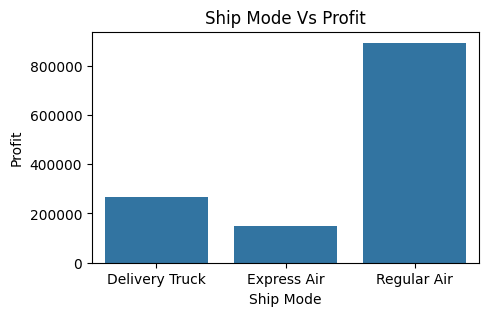

In [ ]:
#Plot in graphs
plt.figure(figsize=(5,3))
sales=data.groupby(["Ship Mode"],as_index=False).Profit.sum()
sns.barplot(data=sales,x='Ship Mode',y='Profit',estimator='sum')
plt.title('Ship Mode Vs Profit')
plt.show()

**Product Category**

In [ ]:
#To get all the product Calegory
pk=data.groupby('Product Category')
for i , j in pk:
    print(i)

Furniture
Office Supplies
Technology


**Product Category ans ship mode**

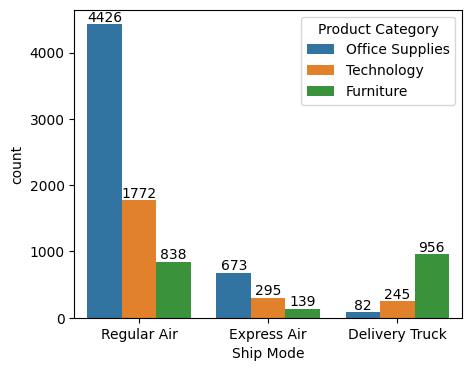

In [ ]:
plt.figure(figsize=(5,4))
fig_3=sns.countplot(data=data,x='Ship Mode',hue='Product Category')
for bars in fig_3.containers:
    fig_3.bar_label(bars)
plt.show()

*From the above graph we can see that Office Supplies is the most selling porduct category in "Regular Air" and "Express Air" but Furniture is the most seeling product in "Delivery Turck"*

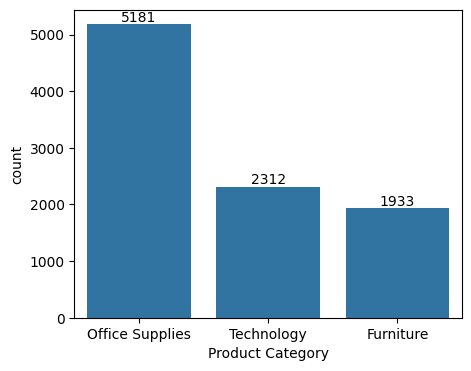

In [ ]:
#Plot product Category in graph for count ita value
plt.figure(figsize=(5,4))
fig_4=sns.countplot(data=data,x='Product Category')
for bars in fig_4.containers:
    fig_4.bar_label(bars)
plt.show()

*From the above graph we can see that Office Supplies is the most selling product*

**To get all the sub products present in product category ptlo each product calegory individually**

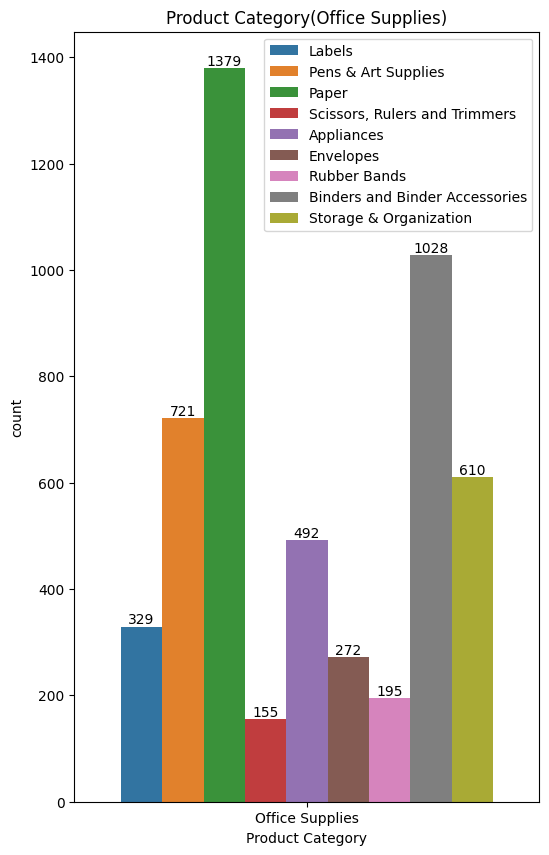

In [ ]:
plt.figure(figsize=(6,10))
fig_5=sns.countplot(data=data[data['Product Category']=='Office Supplies'],x='Product Category',hue='Product Sub-Category')
for bars in fig_5.containers:
    fig_5.bar_label(bars)
plt.title('Product Category(Office Supplies)')
plt.legend(loc='upper right')
plt.show()

*In the Office Supplies, paper is the most selling product*

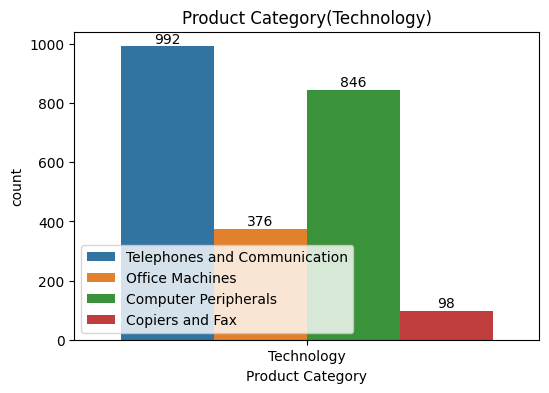

In [ ]:
plt.figure(figsize=(6,4))
fig_6=sns.countplot(data=data[data['Product Category']=='Technology'],x='Product Category',hue='Product Sub-Category')
for bars in fig_6.containers:
    fig_6.bar_label(bars)
plt.title('Product Category(Technology)')
plt.legend(loc='lower left')
plt.show()

*In the Technology category, Telephones And Communication  is the most selling product*

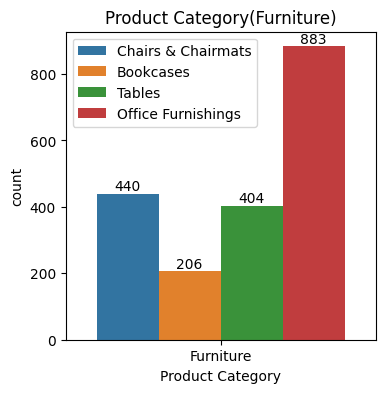

In [ ]:
plt.figure(figsize=(4,4))
fig_7=sns.countplot(data=data[data['Product Category']=='Furniture'],x='Product Category',hue='Product Sub-Category')
for bars in fig_7.containers:
    fig_7.bar_label(bars)
plt.title('Product Category(Furniture)')
plt.legend(loc='upper left')
plt.show()

*In the Furniture category Office Furnishing is the most selling product*

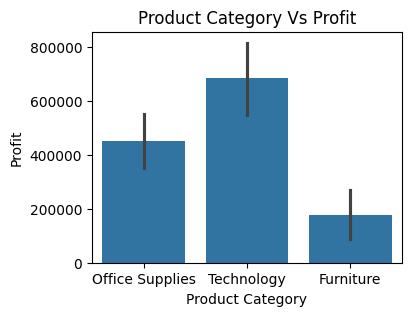

In [ ]:
#Graph for analysis profit in every Product Category
plt.figure(figsize=(4,3))
sns.barplot(data=data,x='Product Category',y='Profit',estimator='sum')
plt.title('Product Category Vs Profit')
plt.show()

*Even the Office Supplies hsa large Number of selling but Technology generates more profit as compare to Office Supplies*

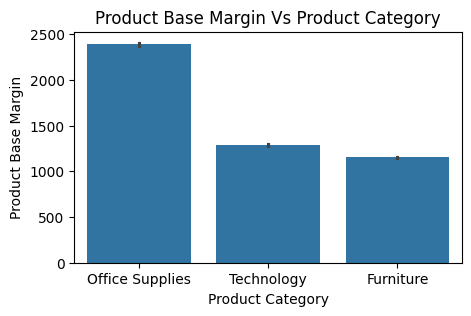

In [ ]:
#Graph for analysis Product Base Margin in every Product Category
plt.figure(figsize=(5,3))
sns.barplot(data=data,x='Product Category',y='Product Base Margin',estimator='sum')
plt.title('Product Base Margin Vs Product Category')
plt.show()

*From the above graph we can see that Office Supplies has high product Base Margin for higher sales*

**Customar segment**

In [ ]:
data['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

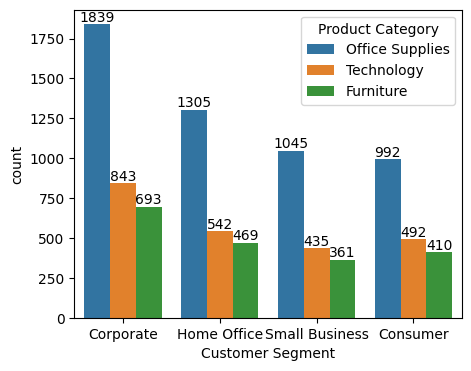

In [ ]:
# to count the no of product Category form different Customar Segment
plt.figure(figsize=(5,4))
fig_8=sns.countplot(data=data,x='Customer Segment',hue='Product Category')
for bars in fig_8.containers:
    fig_8.bar_label(bars)
plt.show()

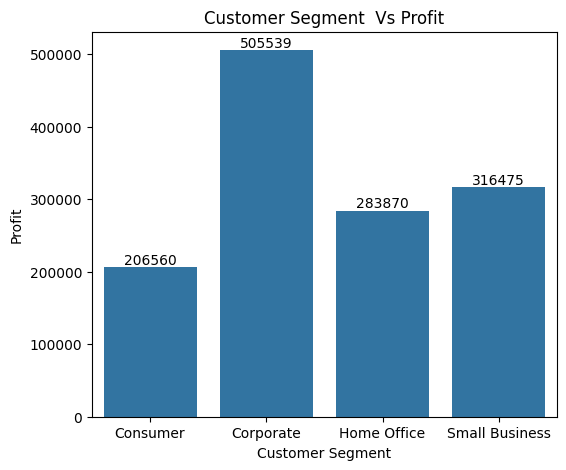

In [ ]:
plt.figure(figsize=(6,5))
sales=data.groupby(['Customer Segment'],as_index=False).Profit.sum()
fig_9=sns.barplot(data=sales,x='Customer Segment',y='Profit',estimator='sum')
for i in fig_9.containers:
    fig_9.bar_label(i)
plt.title('Customer Segment  Vs Profit')
plt.show()

*Corporate sagment contributing higher ptofit as compared to others*

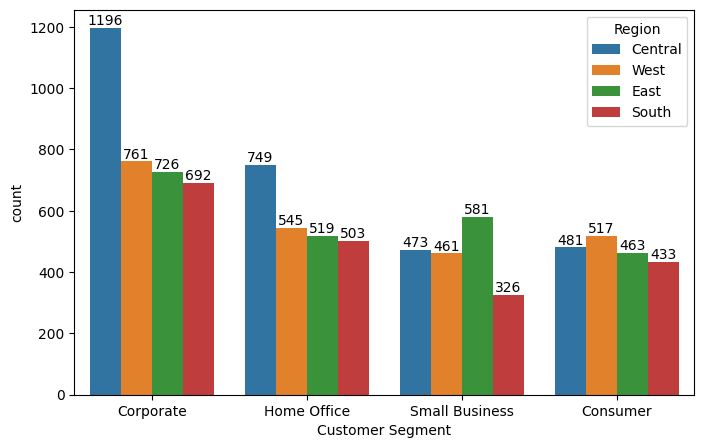

In [ ]:
# to identify different Region from different customar sagment
plt.figure(figsize=(8,5))
fig_8=sns.countplot(data=data,x='Customer Segment',hue='Region')
for bars in fig_8.containers:
    fig_8.bar_label(bars)
plt.show()

In [ ]:
data['City'].value_counts().head()

City
New York City    202
Los Angeles      196
Seattle           93
Chicago           90
Boston            80
Name: count, dtype: int64

In [ ]:
data['State or Province'].value_counts().head()

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [ ]:
print(data['Ship Date'].head(10))

0    30-05-2012
1    08-07-2010
2    28-07-2011
3    28-07-2011
4    27-07-2011
5    11-11-2011
6    08-07-2013
7    15-12-2010
8    21-05-2012
9    26-05-2011
Name: Ship Date, dtype: object


## Conclusion

*If we want to make large porfit in every shipping Mode, we have to incerase sales number in "Delivery Truck", and "Express Air" also,
In product category "Technology" generate more porfit so concetrate on "Furniture" sagment for its growth,and it will also Incerase Product Base Margin of that category.
Most of the customers are from central Region and they are in "Corporate" sector,and its most selling products are form "Ofice Supplies", SO if we add some intresting offers in that cetegory then it will generate more sales .
And "Consumer" generates less profilt, for that we can interact with them and have to gathure feedback and imporve our products.
In central region of Delaware and it's some cities the sales is too low so  focuse on Promotions,Discounts or Lotery programs for customer traffic*